<a href="https://colab.research.google.com/github/codepradosh/Machine-Learning-Revision/blob/main/Notes_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

- **Problem with Accuracy metric**


- **Confusion Matrix (CM)**


- **Precision**


- **Recall**


- **Other metrics based on confusion matrix**
    - True Positive Rate (TPR)
    - True Negative Rate (TNR)
    - False Negative Rate (FNR)
    - False Positive Rate (FPR)
    - Sensitivity and Specificity

- **F1 score**





## Problems with Accuracy

### Imagine you are Data Scientist at Google

You are working on Email spam detection model

Here,
- not spam will be -ve class (class 0)
- spam will be +ve class (class 1) 

Usually, the count of **spam emails** is considerably **very low** (~ 10%) than **relevant (not spam) emails** (~ 90%)

Now, we built the model and it is giving 90% accuracy on unseen data.




#### Question: Is this a good model? 

No. The model is as good as dumb model.

Consider a model 
- which only predicts every email as not spam
- the accuracy for this model will be 90% which sounds good.

 


### **What are the issues with Accuracy?**

- **The accuracy metric doesn't work when we have imbalanced dataset**
- You may achieve an accuracy of 90% or more but is not a good score if 90 datapoints out of 100 belong to one class as you can achieve this score by always predicting the most common class value. 

- does not consider probabilties. 

## **Confusion Matrix**



#### What if we had something that could give us a granular view of prediction

For each class, we may want to know 
 - how many datapoints are being correctly predicted
 - and how many wrongly predicted and to which class

**Confusion matrix** does exactly that.

Let's see what confusion matrix actually is

### Lets look the cells of Confusion Matrix in detail

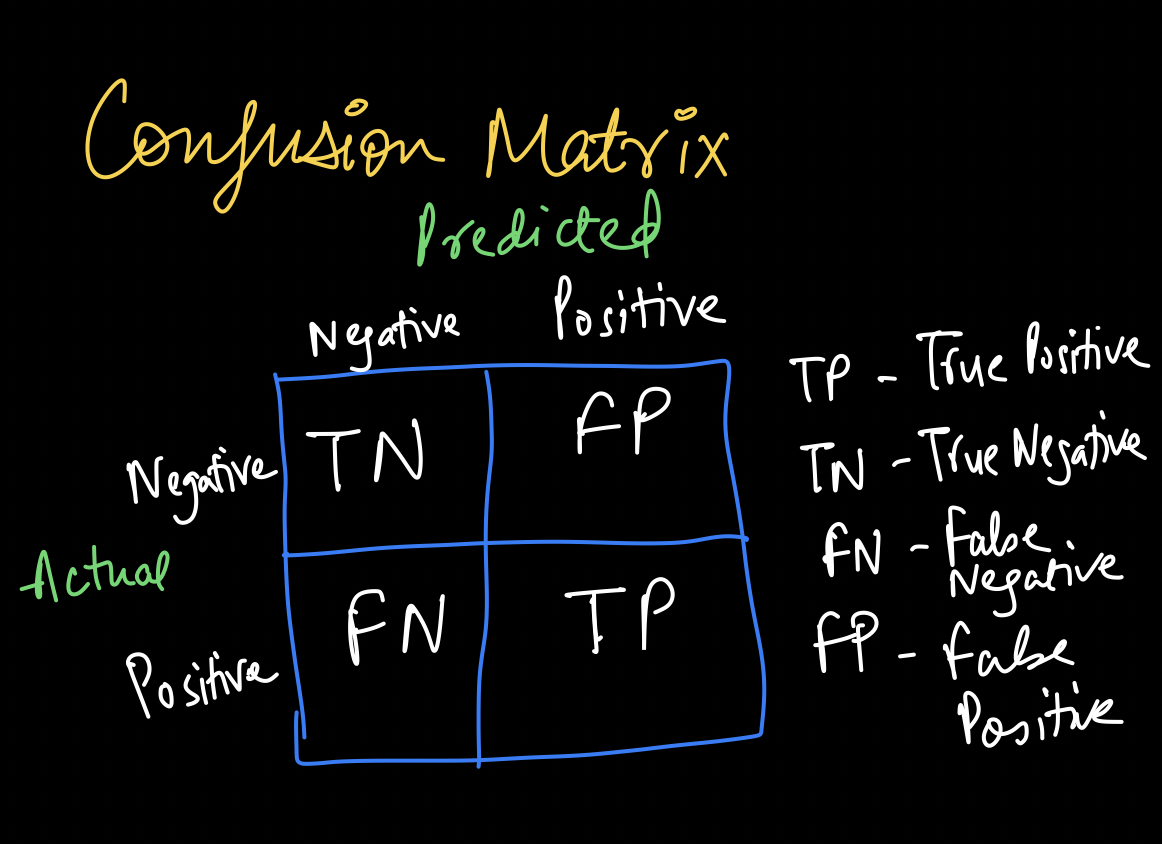

Assume that the task at hand is binary classification i.e. two class labels (0,1)

We make a $2 × 2$ grid such that:

The matrix is divided in 4 quadrants

Lets look at the cells with correct classifications first

- **True Positive (TP)**: 
    - Number of Datapoints that were actually  positive (1) and predicted as positive (1). 
    - For example:  You **predicted a mail is a spam and it actually is**.

- **True Negative (TN)**: 
    - Datapoints that were actually negative (0) and predicted as  negative (0).
    - For example: You **predicted a mail is not spam and it actually is not**.

Notice, **correct classifications lie on the diagonal**

Lets look at the cells with wrong classifications

- **False Negative (FN)**: 
    - Number of Datapoints that were actually positive (1) but predicted as negative (0)
    - or a point which is actually positive but falsly classified as negative
    - For example: You **predicted a mail is not spam and it actually is**.
    - Also called **Type 2 Error**


- **False Positive (FP)**: 
    - Datapoints that were actually negative (0) but predicted as postive class (1)
    - or a point which is actually negative but falsly classified as positive.
    - You **predicted a mail is not spam and it actually is**.
    - also called as **Type 1 Error**

### **Is there a hack to remember the confusion matrix terms placement**

Let's dissect the terms
- First Term: True or False
- Seond Term: Positive or Negative

#### Question: Did you see any pattern in the naming here for first term?

1. Names of Correct classifications start with "True"
2. Names of Incorrect classifications start with "False"

#### Question: Did you see any pattern in the naming here for second term?

Second term gives us the "predicted" value

A **simple hack** to remember them is
- **Is actual and predicted label matching (is it correct classification)?**
- **What is the predicted class?**

Let's take an example of False Negative

#### Question: Are actual and predicted label matching? 

Ans: No. Hence, we write False

#### Question: What is the predicted class for that space?

Ans: Negative.

Hence, False Negative will be placed in space when actual class is postive and predicted is negative 

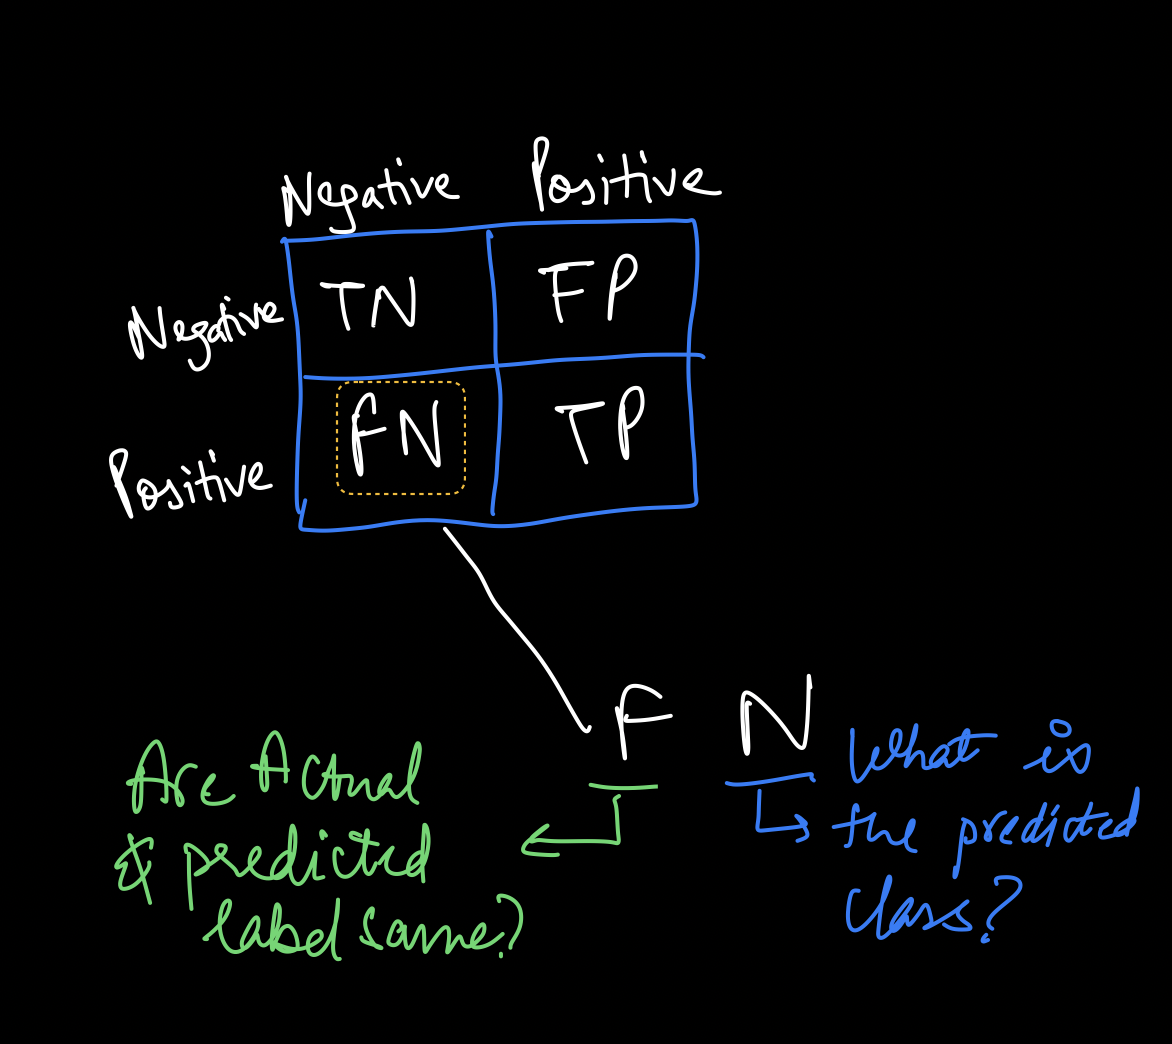

So, we have learnt about CM matrix


Lets look at two more things

1. **How will the confusion matrix for dumb model look for spam classification?**
2. **How will the confusion matrix for an ideal model for spam classification??**

In reality, it will be something in the middle of it

## **How will the confusion matrix for dumb model look for spam classification?**

Assume

1. 400 datapoints in test set
2. **90% data is non-spam ==> 360 non-spam, 40 spam**
3. Dumb Model - predicts all 400 emails as non-spam (-ve, 0)


Lets do correct classification first

#### What will be True Positive?

0, since everything is predicted as negative class

#### What will be True Negative?

All 360 non-spam will be predicted as non-spam ==> 360
Lets now look into incorrect classification

#### What will be False Positive?

- We need to look for non-spam emails which were predicted as spam
- But since all the emails are predicted as non-spam ==> 0

#### What will be False Negative?

- We need to look for spam emails which were predicted as non-spam
- We have 40 spam emails in the test, all predicted as non-spam ==> 40


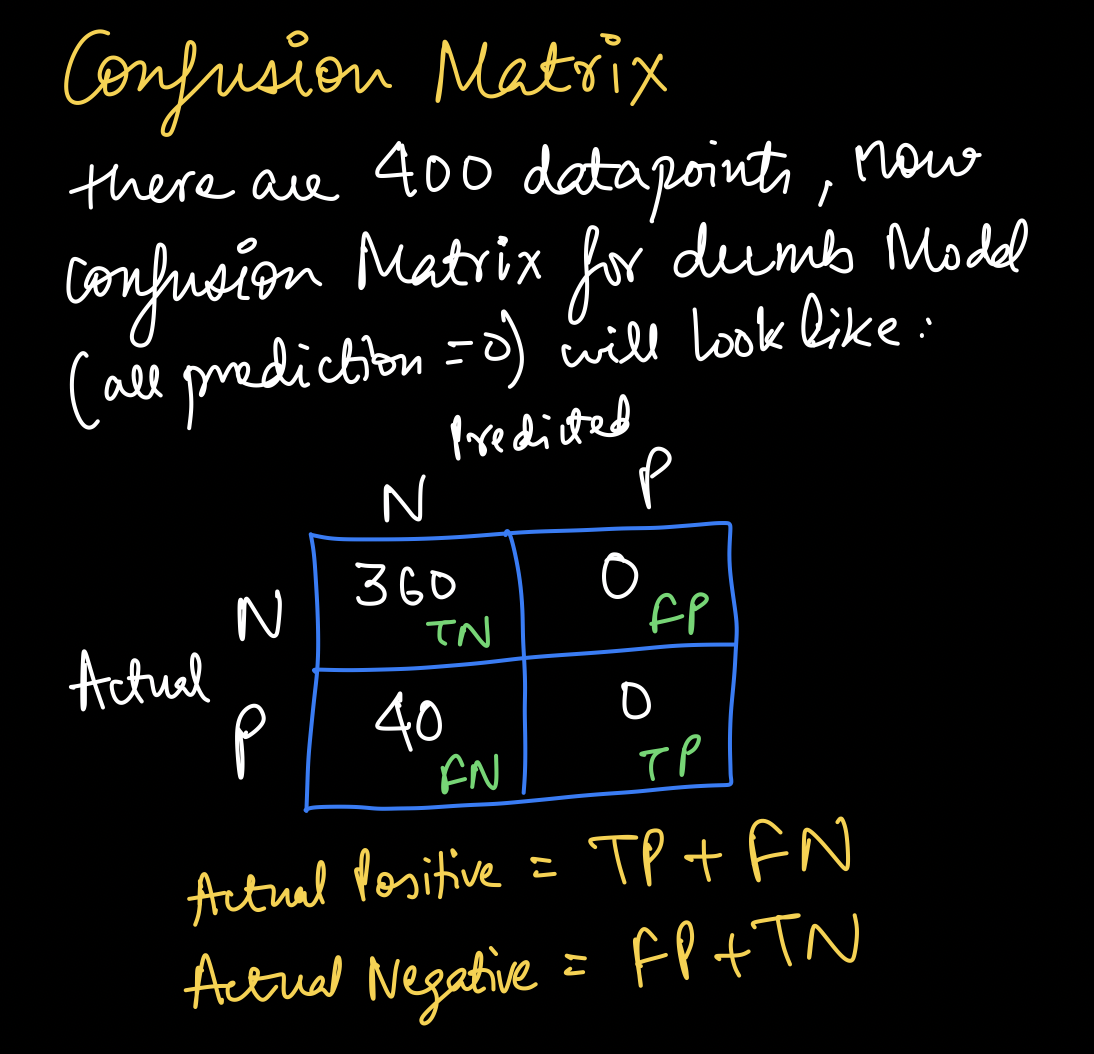

#### Question: Can you now tell if our model with 90% accuracy actually a good model?

1. Both TP and TN should be high
2. Both FP and FN should be low

All spams(+ve) are being predicted as non-spam (-ve)

- High TN, but TP is "very low"
- Low FP, but high FN

Hence, we can conclude the spam detection model we have build is not actually good model.

#### Question: Given CM, how would you calculate actual positive (or actual negatives)?
- TP + FN = P (total actual positives) $⇒ 0 + 40 = 40$
- FP + TN = N (total actual negatives) $⇒ 0 + 360 = 360$


Lets work on the second question





## **How will confusion matrix for "ideal" model look for spam classification model?**

- Ideal Model ==> No incorrect classification
- That means, FP=0 and FN=0

#### What will be TP?

Same as actual number of spams ==> 40

#### What will be TN?

Same as actual number of non-spams ==> 360



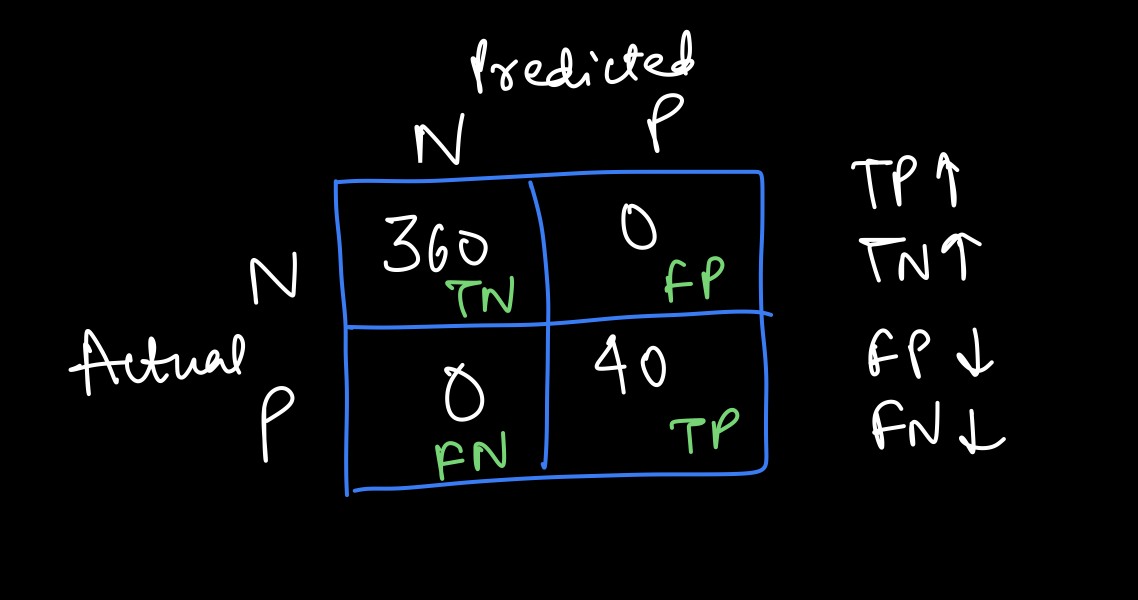

### **How do we calculate Confusion Matrix (CM)?**

If you had to calculate it by hand

#### Question: What all data would you require?

Actual target (y), and predicted target (y_hat)

Lets create CM for a "random" model - random predictions

In [ ]:
import pandas as pd
import numpy as np


#### Lets load a dummy Spam/No-Spam data

with imbalanced ratio of 100:1 (not spam: spam)

In [ ]:
!gdown 1_jZRFvpjElFBGyOO-_4Cv68-n2cDbNUn

Downloading...
From: https://drive.google.com/uc?id=1_jZRFvpjElFBGyOO-_4Cv68-n2cDbNUn
To: /content/pred_data.csv
100% 247k/247k [00:00<00:00, 98.2MB/s]


In [ ]:
data = pd.read_csv('pred_data.csv')

data.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


**observe**

The file contains $y$ and $ŷ$ values for Spam/ Not Spam data

Lets see the imbalance data

In [ ]:
data['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

We can see how No Spam samples are 100 times more than Spam samples showing data is imbalanced

#### Lets generate y_pred by keeping threshold as 0.5

In [ ]:
data['y_pred'] = data['proba'].apply(lambda y_score: 0.0 if y_score < 0.5 else 1.0)

#### Lets use sklearn `confusion_matrix` function to get the values 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(data.y, data.y_pred)
conf_matrix # 2D np array

array([[9761,  239],
       [  45,   55]])

#### How do we know which one is what?

Lets check the sklearn [documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

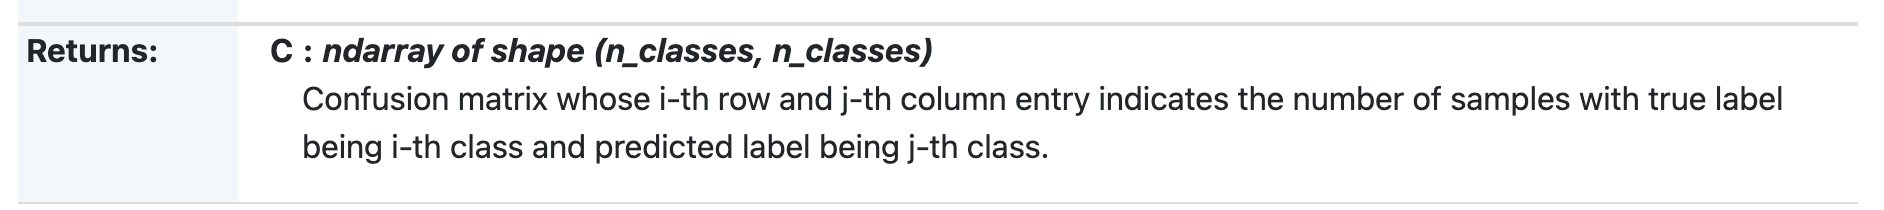

But the `ConfusionMatrixDisplay` plotting functionality in sklearn makes this easy

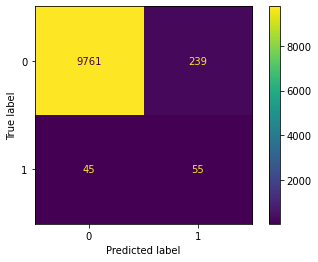

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()



#### Question: There are 239 predictions in top right quadrant. Is it FP or FN ? 
Ans: FP



We have been using "Accuracy" as the performance metric until now

## **Question: How will you calculate accuracy from confusion matrix ?** 


$Accuracy = \frac{Correct \space Predictions}{Total \space number \space of \space predictions}$

#### How will we get correctly classified points from confusion matrix ? 

Sum of TP and TN

#### How will we get total number of predictions?

Sum of all TP, FP, FN, TN.





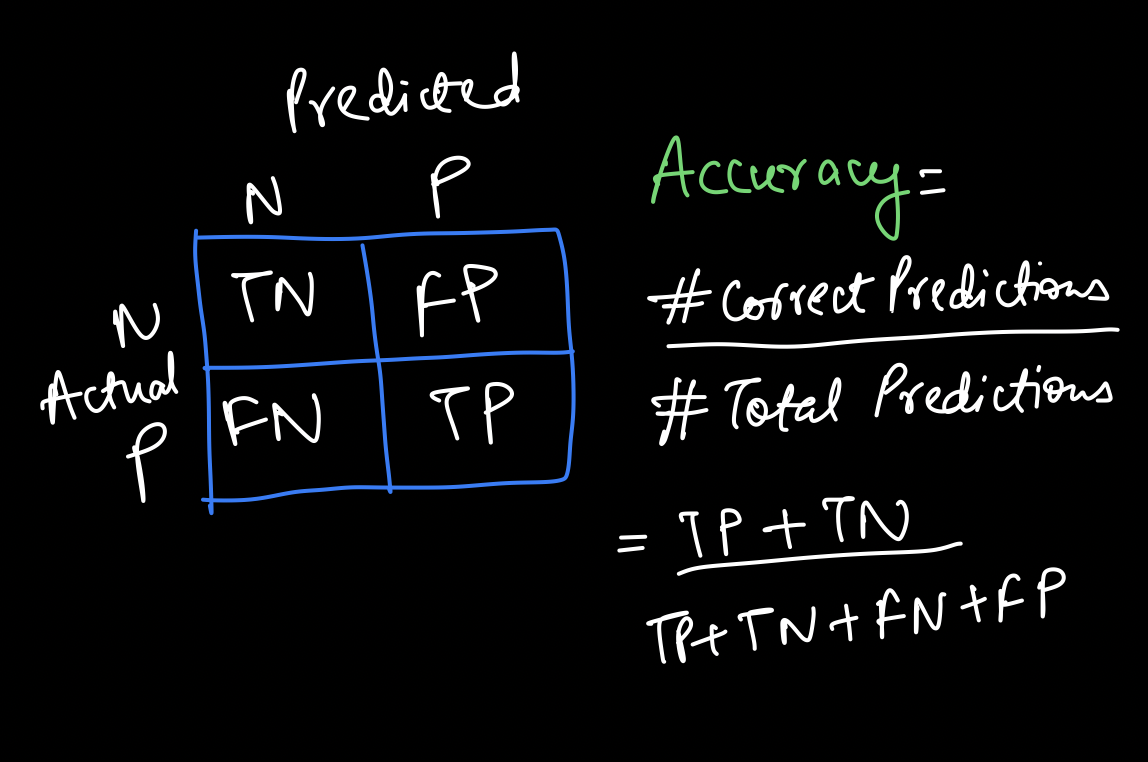

#### How do we get the count of correct classification from 2D array?

Sum all the elements across diagonals

#### Accuracy

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9718811881188119

# **Precision**

Clearly, Accuracy wasn't a good indicator of performance for imbalanced data

#### What can be a good metric?

#### Question: Which situation do you think would be more critical?

1. Receiving a spam email in your inbox (think of FN)
2. Missing "appreciation mail from manager" (think of it as FP)

Obviously, appreciation mail from manager.

- Missing out on classifying spam as not spam is somewhat acceptable i.e False Negative
- However, classifying an important mail as spam can lead to major loss i.e. False Positive.

==> Reducing False Positive is more critical here


We want a metric that focuses on
- Reducing False Positive (not spam classified as spam), if FP ⇑ ==>  Metric ⇓ 
- Increasing True Positive (spam classified as spam), if TP ⇑  ==>  Metric  ⇑



#### What metric can we use in this case?


We somehow need to ensure that **out of all the emails which are predicted as spam, a high number of them are actually "spam"**

OR 

Out of all the emails predicted as spam, **very low number of emails are not spam** (low FP)


$\frac{TP}{TP + FP}$ = $\frac{True Positive}{Predicted \space Positive}$ 


This metric is called **Precision**


**Precision is the ratio of true positive to the predicted positives** (sum of True positive and False Positive)

#### What does precision tell intuitively? 
Intuitively, precision tell us **out of all points predicted to be positive, how many are actually postives**

Think about it, it basically tells, **how precise our model is**(with the predictions). Hence, the term precision. 


Now, for our spam classification model, 
- if False postives are high (important mail being classifed as spam)
- the denominator sum will go up
- overall precision score will drop.



#### Question: What do you think will be "range" of Precision?

=> Precision score will lie between 0 to 1.

We saw that Accuracy for our "dumb" model was 90%

Lets see what precision metrics tell us

#### How can we calculate Precision (for +ve class) using CM?  

#### What will be the predictions for dumb model?

All non-spam (0/-ve)

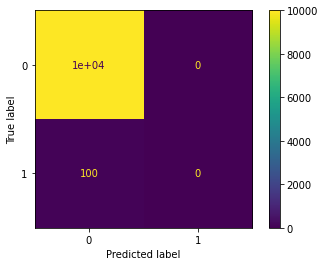

In [ ]:

y_pred = np.zeros(len(data.y)) # predictions of a dumb model
conf_matrix = confusion_matrix(data.y, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

#### How do we get TP for +ve/1 class?

Diagonal element corresponding to class 1

In [ ]:
tp = conf_matrix[1, 1]
tp

0

#### How do we get Predicted Postive (for 1/+ve class)?

Column corresonding to class 1

In [ ]:
pred_pos = conf_matrix[:, 1].sum()
pred_pos

0

Usually, when we build a model, not all the predictions will 0

In [ ]:
pred_pos += pred_pos + 0.0000001 # add a small number in the denominator

In [ ]:
precision = tp / pred_pos
precision

0.0

#### Given y and y_pred, how can we calculate precision?

We can do it using sklearn library 

In [ ]:
from sklearn.metrics import precision_score
precision_score(data.y, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

Looks like precision of the "dumb" model is 0

Lets check the precision for "random" model

In [ ]:
precision_score(data.y, data.y_pred)

0.1870748299319728

Notice: Even **random model > dumb model** if it comes to **making sure that we dont miss any important email**

## **Recall**

#### Imagine a scenario where we are building model to **detect cancer**
The model's task is to assist with the medical tests "preliminary screening"

#### Question: What will be +ve/-ve class in this case?
- Positive class: cancerous
- Negative class: non cancerours 

#### What situation would be more critical? 
1. Classify a healthly person as having cancer (False Postive)
2. Misclassify a person having cancer as healthy  (False Negative)

Secound sitatuion can have dire consequences

- Classifying a heathly person as cancerous and carry out further testing is somewhat acceptable
- However, classifying person with cancer as healthy can be life death situation.

==> **Reducing False Negatives is more critical here**



We want a metric that focuses on

Reducing False Negatives (cancerous classified healthy), if FN ⇑ ==> Metric ⇓

Increasing True Positive (cancerous classified as cancerous), if TP ⇑ ==> Metric ⇑


#### What metric can we use for this case?

We want to **make sure we don't miss out any cancerous patient**

OR

We want to **make sure that people having cancer are correctly classified** 

==> False Negative should be low, True Positives should be high

**We want a metric that focuses on False negatives as well as True Positives**

#### What metric do we use?




$\frac{True Positive}{True Postive + False Negative}$ = $\frac{True Positive}{Actual Positives}$

This metric is called **Recall**


Recall is the **ratio of True Postives to the actual positives** (sum of TP + FN)

Think about it, it means, how good the model is recalling the actuals i.e. how many actual it predicted correctly (positive actuals)

#### What does Recall mean intuitively?

Intuitively, Recall tells us **out of all the actually positive points, how many of them are predicted to be positive**


Since False negative is in denominator
- when FN is low and TP is high
- recall will be high 



#### Question: What will be the range of recall score?

Recall score will lie between 0 to 1.

#### Question: What do you think will be recall for dumb model for spam detection model? 

Let's calculate it using CM

#### How can we calculate Recall (for +ve class) using CM?

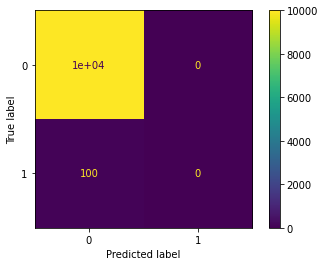

In [ ]:
y_pred = np.zeros(len(data.y)) # predictions of a dumb model
conf_matrix = confusion_matrix(data.y, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
tp = conf_matrix[1,1]

#### Question: How can we get actual positives from CM?

In [ ]:
actual_positives = conf_matrix[1,:].sum()

In [ ]:
recall = tp/actual_positives
print(recall)

0.0


Let's calculate it using sklearn as well

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(data.y, y_pred)

0.0

#### What will be recall for random model ?

In [ ]:
recall_score(data.y, data.y_pred)

0.55

Notice, for our spam detection model

- Precision was low (0.18), Recall is still high(er) (0.55)
- But remember, our focus here was to maximise the Precision

==> Both Precision and Recall values support our argument that dumb model isn't good.

## **Summarizing Precision & Recall**

## **Lets look at some key-points towards summarising Precision and Recall**

$Precision = \frac{TP}{TP + FP}$ = $\frac{True Positive}{Predicted Positive}$ 



$Recall = \frac{True Positive}{True Postive + False Negative}$


Did you notice that there is **no True Negative** in both Precision and Recall?

- Precision deals with TP and FP
- Recall deals with TP and FN.

IMPORTANT

**Both Precision and Recall are defined corresponding to the +ve class** 

BUT

If **generalised to multi-class classification, we can calculate Precision and Recall w.r.t to class of interest**


####  Are there hacks to remember Precision/Recall?

-   When you cannot afford to have any false negatives (any misses in detecting the +ve), you prioritize recall.

- When you cannot afford to have any false positives (wrong +ve detections), you prioritize precision.



# **Other metrics based on confusion matrix**

There are couple of other metrics which you may come across

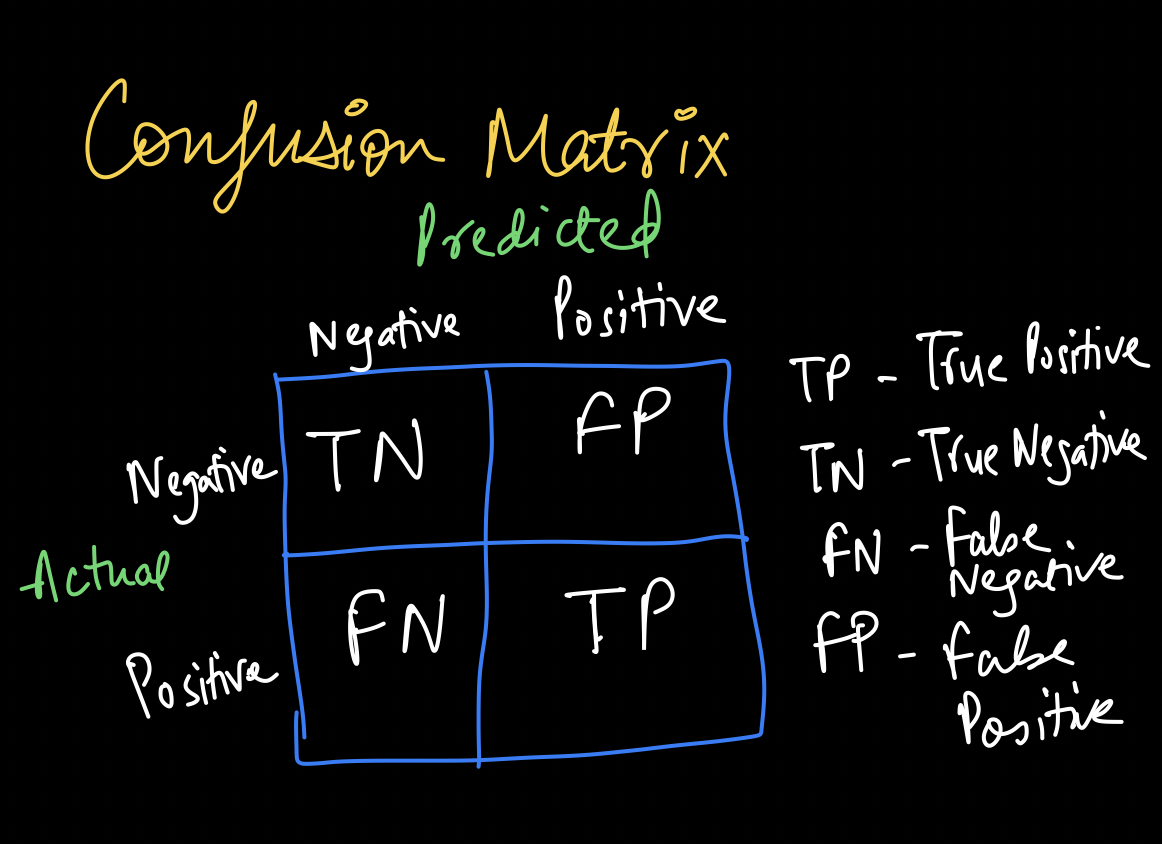

### True Positive Rate (TPR)

$TPR = \frac{TP}{Actual Positive} = \frac{TP}{TP + FN}$


True Positive rate defined as the **ratio of True positives (TP) to the actual positives** (P = TP + FN)

#### Doesn't the formula seem familiar ? 

Yes it does! **TPR is same as Recall**.

#### Question: What does TPR mean intuitively? 

- Intuitively, it tells, **out of all datapoints which are actually positive, how many are predicted to be postive**

- It is also called as **Sensitivity**



### True Negative Rate (TNR)

$TNR = \frac{TN}{Actual Negative} = \frac{TN}{TN + FP}$



True Negative Rate or TNR is the **ratio of True negatives (TN) to the actual negatives** (N = TN + FP)

#### What does TNR mean?
- Intutively, it tells, **out of all the points which are actually negative, how many have been predicted to be negative**

- It is also called as **specificity**

Notice that,
- both TPR and TNR focus more on correct prediction

### Question: Can you guess other 2 metrics? (Hint: FN , FP)

TPR/TNR focus on **what % prediction are correct out of actual postive/negaive**

We have other metric (FPR/FNR) which tells **what % predictions we got misclassified out of actual positive/negative**

#### False Negative Rate (FNR)

$FNR = \frac{FN}{Actual Positives} = \frac{FN}{TN + TP}$




False Negative Rate (FNR) is defined as ratio of False Negatives (FN) to the actual positives (P = TP + FN)

Intuitively, it tells, **out of all datapoints which are actually positive, how many are misclassified as negative**

#### False Positive Rate (FPR)

$FPR = \frac{FP}{Actual Negative} = \frac{FP}{TN + FP}$



False Positive Rate (FPR) is defined as ratio of False Positives (FP) to the actual negatives (N = TN + FP)

Intuitively, it tells, **out of all datapoints which are actually negative, how many are misclassified as positive**

### Are there any hacks to remember TPR/TNR/FNR/FPR?

There are are two terms:
- Numerator
- Denominator

**Did you notice?**

We are always **dividing** the term by either **actual positive** or **actual negative**.


#### How to figure out numerator ? 

We can figure out the numerator simply by looking at what we have to calculate

Main concern is remember what to divide it by i.e. denominator

#### How to figure out denominator?

Actual positive = correctly predicted positive(TP) + point which were supposed to be postive but predicted negative(FN)

P = TP + FN.

Since, **actual positive contain TP and FN**,
- we use **actual positive as denominator for TPR/FNR**

Actual negative = correctly predicted negative(TP) + point which were supposed to be negative but predicted positive(FP)

N = TN + FP

Since, **actual negatives contain TN and FP**
- we use it as **denominator for both TNR and FPR**

The trick is to figure out whether the **numerator term is part of actual positive or actual negative**


## **Sensitivity and Specificity**


We just learnt that

- TPR is also called Sensitivity
- TNR is also called Specitivity



<img src='https://drive.google.com/uc?id=1twc1hdTDoZaI5px9S857nFLMbeeu63Nt' width = 600>

source: wiki


Sensitivity and Specificity are related medical domain.

They are used to measure **how good a test is at correctly identifying the presence or absence of a disease**

In medical terms,

- **Sensitivity is the proportion of people with the disease who test positive for it**

- **Specificity is the porportion of people without the diease who test negative for it**


#### What does high sensitivity means?

It means that the test is **good to be used as screening test** as there is **low chance of missing out a person with disease** (low false negatives)

#### What does high specificity means?
It means that **test is good for confirmatory test** as there will be **low false positives**



## **F1 score**

#### **Imagine you are working as Data Scientist for UpStart** 
(company which provides loan based on education and emplyoment instead of credit rating)

**Task:** Create loan predicion model

#### What do we want to predict?
Predict whether a person will be able to repay the loan or not.

#### What will be +ve/-ve class?
- Postive class: Person will be able to repay loan
- Negative class: Unable to repay the loan.




#### **What mindset will fintech company have for giving out loan?**
- Loss to business if they give loan to people who are unable to repay it (False Positive)
- Also a loss  if they miss out on good people who will be able to repay (False Negative)

#### What metric should we use here?
Since we have to focus on both False Postivie as well as False Negatives, we use both Precision and Recall




#### Comparing model based on precision recall

Suppose, you built 3 model and recorded their precision and recall score.

The scores are as follows:

<img src='https://drive.google.com/uc?id=1WW1JgJMf5E6h7-ZhkPz8taQD9fBrfxuv' width = 500>


#### Which model is better ?

- If we compare models based on precision, then model C is best
- If we compare models based on Recall, then model A is best.

Clearly, it is difficult to compare model based on two metrics.

#### How do we compare two model? 

What if we combine precision and recall into a single metric? 

#### How do combine these two metrics?

We want to create a metric such that
- when precision is high and recall is high ==> metric is high as well

=> Let's take **simple average**  i.e. $(Precision + Recall)/2$

Let's look at an example:



<img src='https://drive.google.com/uc?id=19cRrnA5PYckJl1Amur4XAMUulUHnrWRU'>

#### Issue with arth. mean of score ?

- When both Precision and Recall are 0.7
    - we get an score of 0.7

However, in second case
- precision rose to 0.9
- recall reduced to 0.5
- arth. mean remained the same.

Arithematic Mean approach isn't penalizing the reduction in recall .

We want a metric which 
- penalizes the drop in precision and recall (arithematic mean is failing here)
- should be high when both precision and recall are high.







#### What if we use **Harmonic mean** ?

<img src='https://drive.google.com/uc?id=1xvPkxmzAfi6x1396LaIKR6kHLWCSE6lb'>


Notice that for Harmonic mean
- when both Precision and recall were 0.7, the score was 0.7
- However, in second case when 
    - precision rose to 0.9
    - recall dropped to 0.5
    - Harmonic mean dropped to 0.642

Harmonic mean is penalizing the drop in precision and recall.

This Harmonic mean is nothing but **F1- score** 

<br>

F1-score = $ \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = \frac{2.Precision.Recall}{Precision + Recall}$

<br>

Hack to remember: We are using Harmonic mean as we are trying to find harmony between the two.

#### How to calculate F1 score?

#### Question: What will be the f1 score for dumb model?

Ans: 0 As both precision and recall are 0.

Let's calculate f1 score for random model

In [ ]:


precision = precision_score(data.y, data.y_pred)
recall = recall_score(data.y, data.y_pred)
print('Precision:', precision)
print('Recall:', recall)

f1_score = 2*precision*recall/(precision + recall)
print('F1 score:',f1_score)

Precision: 0.1870748299319728
Recall: 0.55
F1 score: 0.2791878172588833


Notice that,
- as precision is low
- it is dragging down the f1 score.

#### Can we calculate it using sklearn as well ? 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(data.y, data.y_pred)

0.2791878172588833